<a href="https://colab.research.google.com/github/LeMagnifiq/GameInsightsML/blob/main/GameInsightsMLipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning: Video Game Sales and Ratings

## Downloading Dataset

In [1]:
! pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"lemagnifiq","key":"8d03255afa4acff15e58b719f0ee8da4"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d thedevastator/video-game-sales-and-ratings

  0% 0.00/540k [00:00<?, ?B/s]
100% 540k/540k [00:00<00:00, 82.6MB/s]


In [5]:
!unzip video-game-sales-and-ratings.zip

Archive:  video-game-sales-and-ratings.zip
  inflating: Video_Games.csv         


## Libraries


In [6]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Dataset

In [7]:
df = pd.read_csv('Video_Games.csv')
print(df.head())

   index                      Name Platform  Year_of_Release         Genre  \
0      0                Wii Sports      Wii           2006.0        Sports   
1      1         Super Mario Bros.      NES           1985.0      Platform   
2      2            Mario Kart Wii      Wii           2008.0        Racing   
3      3         Wii Sports Resort      Wii           2009.0        Sports   
4      4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   

  Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  \
0  Nintendo     41.36     28.96      3.77         8.45         82.53   
1  Nintendo     29.08      3.58      6.81         0.77         40.24   
2  Nintendo     15.68     12.76      3.79         3.29         35.52   
3  Nintendo     15.61     10.93      3.28         2.95         32.77   
4  Nintendo     11.27      8.89     10.22         1.00         31.37   

   Critic_Score  Critic_Count User_Score  User_Count Developer Rating  
0          76.0          5

## Data Exploration

In [8]:
# Check for missing values in each column
missing_values = df.isnull().sum()
print(missing_values)

index                 0
Name                  2
Platform              0
Year_of_Release     273
Genre                 2
Publisher            55
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8668
Critic_Count       8668
User_Score         6769
User_Count         9210
Developer          6688
Rating             6836
dtype: int64


## Data Cleaning and Transformation

In [9]:
# Drop rows with missing values in 'Name' and 'Genre'
df = df.dropna(subset=['Name', 'Genre'])

In [10]:
# Replace missing values with the mode for 'Publisher', 'Developer', and 'Rating'
df['Publisher'].fillna(df['Publisher'].mode()[0], inplace=True)
df['Developer'].fillna(df['Developer'].mode()[0], inplace=True)
df['Rating'].fillna(df['Rating'].mode()[0], inplace=True)

<ipython-input-10-3afa1177266f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Publisher'].fillna(df['Publisher'].mode()[0], inplace=True)
<ipython-input-10-3afa1177266f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Developer'].fillna(df['Developer'].mode()[0], inplace=True)
<ipython-input-10-3afa1177266f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rating'].fillna(df['Rating'].mode()[0], inplace=True)


In [11]:
df['User_Score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [12]:
df['User_Score'].value_counts()['tbd']

2441

In [13]:
df['User_Score'].replace('tbd', '0', inplace=True)

<ipython-input-13-3f478ddaf169>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['User_Score'].replace('tbd', '0', inplace=True)


In [14]:
# Fill missing values in 'Critic_Score' and 'User_Score' with mean
df['Critic_Score'].fillna(df['Critic_Score'].mean(), inplace=True)
df['User_Score'].fillna(df['User_Score'].astype(float).mean(), inplace=True)

<ipython-input-14-ddc026a78c55>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Critic_Score'].fillna(df['Critic_Score'].mean(), inplace=True)
<ipython-input-14-ddc026a78c55>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['User_Score'].fillna(df['User_Score'].astype(float).mean(), inplace=True)


In [15]:
# Check for missing values again
missing_values_after = df.isnull().sum()
print(missing_values_after)

index                 0
Name                  0
Platform              0
Year_of_Release     273
Genre                 0
Publisher             0
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score          0
Critic_Count       8666
User_Score            0
User_Count         9208
Developer             0
Rating                0
dtype: int64


In [16]:
# Fill missing values in 'Year_of_Release' with the median
df['Year_of_Release'].fillna(df['Year_of_Release'].median(), inplace=True)


<ipython-input-16-557bb5288aef>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year_of_Release'].fillna(df['Year_of_Release'].median(), inplace=True)


In [17]:
# Fill missing values in 'Critic_Count' and 'User_Count' with 0
df['Critic_Count'].fillna(0, inplace=True)
df['User_Count'].fillna(0, inplace=True)

<ipython-input-17-f3d339beb707>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Critic_Count'].fillna(0, inplace=True)
<ipython-input-17-f3d339beb707>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['User_Count'].fillna(0, inplace=True)


In [18]:
# Check for missing values again
missing_values_final = df.isnull().sum()
print(missing_values_final)

index              0
Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          0
Rating             0
dtype: int64


## Insights

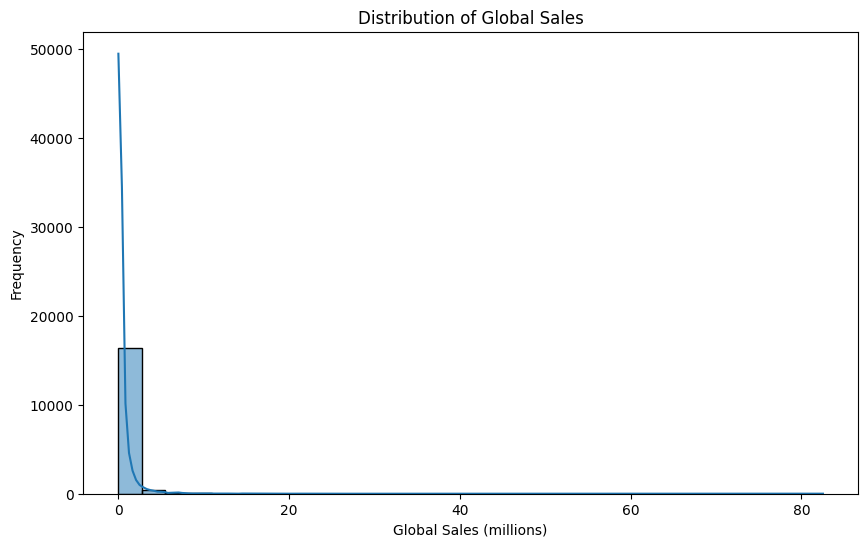

In [19]:
# Visualize the distribution of Global Sales
plt.figure(figsize=(10, 6))
sns.histplot(df['Global_Sales'], bins=30, kde=True)
plt.title('Distribution of Global Sales')
plt.xlabel('Global Sales (millions)')
plt.ylabel('Frequency')
plt.show()


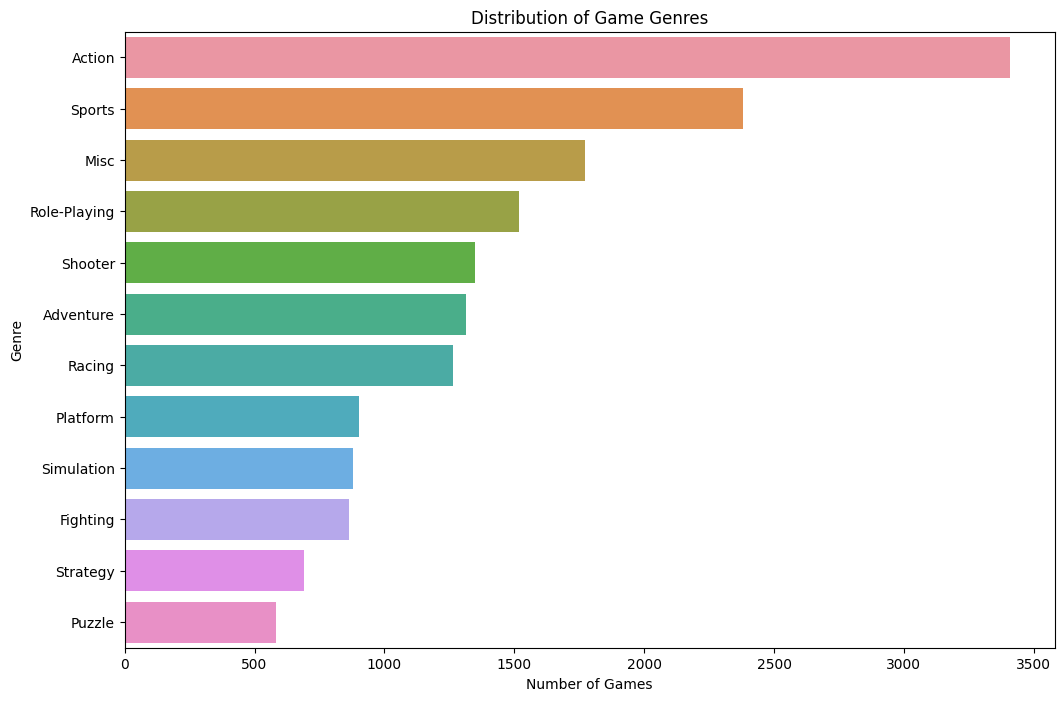

In [20]:
# Visualize the distribution of game genres
plt.figure(figsize=(12, 8))
sns.countplot(y='Genre', data=df, order=df['Genre'].value_counts().index)
plt.title('Distribution of Game Genres')
plt.xlabel('Number of Games')
plt.ylabel('Genre')
plt.show()


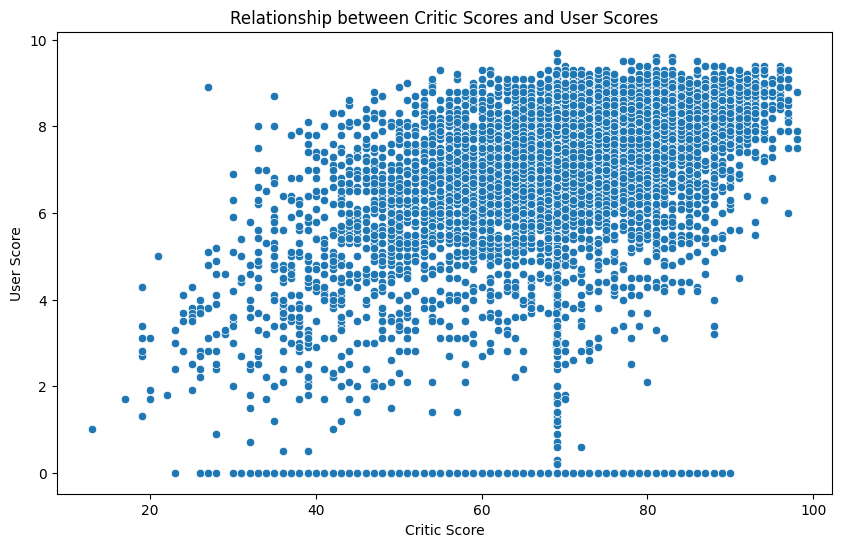

()

In [21]:
# Convert 'User_Score' to numeric, coerce errors to handle non-numeric values
df['User_Score'] = pd.to_numeric(df['User_Score'], errors='coerce')

# Visualize the relationship between Critic Scores and User Scores
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Critic_Score', y='User_Score', data=df)
plt.title('Relationship between Critic Scores and User Scores')
plt.xlabel('Critic Score')
plt.ylabel('User Score')
plt.show()
()


<ipython-input-22-3257e2ce1fab>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Global_Sales', y='Genre', data=df, ci=None)


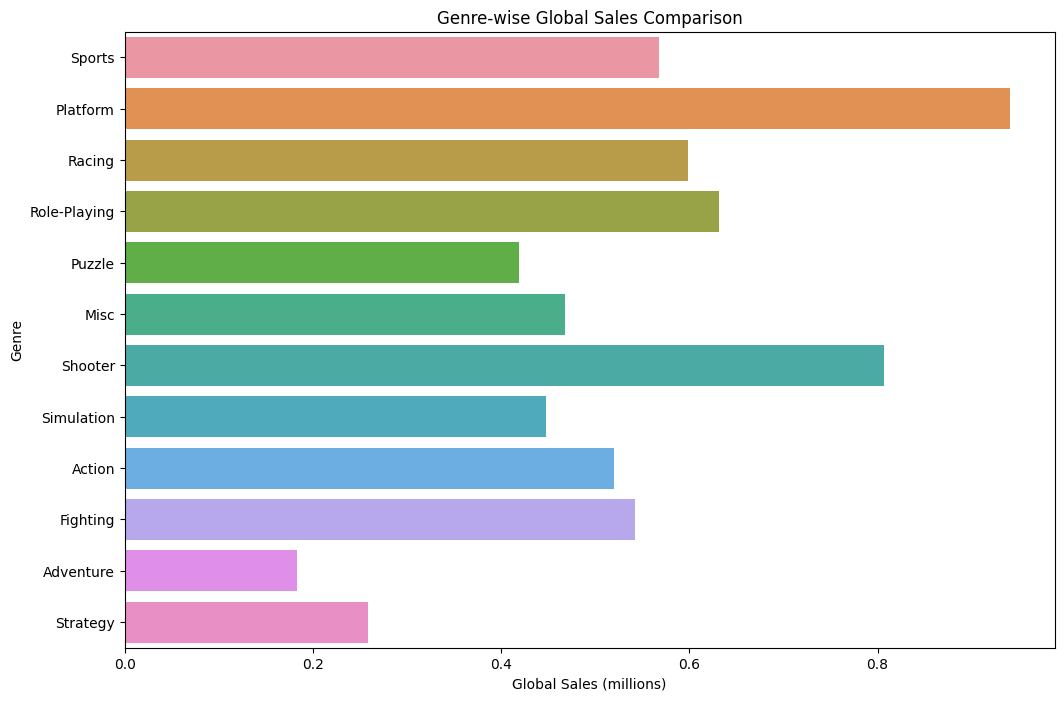

In [22]:
# Visualize genre-wise sales comparison
plt.figure(figsize=(12, 8))
sns.barplot(x='Global_Sales', y='Genre', data=df, ci=None)
plt.title('Genre-wise Global Sales Comparison')
plt.xlabel('Global Sales (millions)')
plt.ylabel('Genre')
plt.show()


<ipython-input-23-15a950817f9f>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Global_Sales', y='Platform', data=df, ci=None)


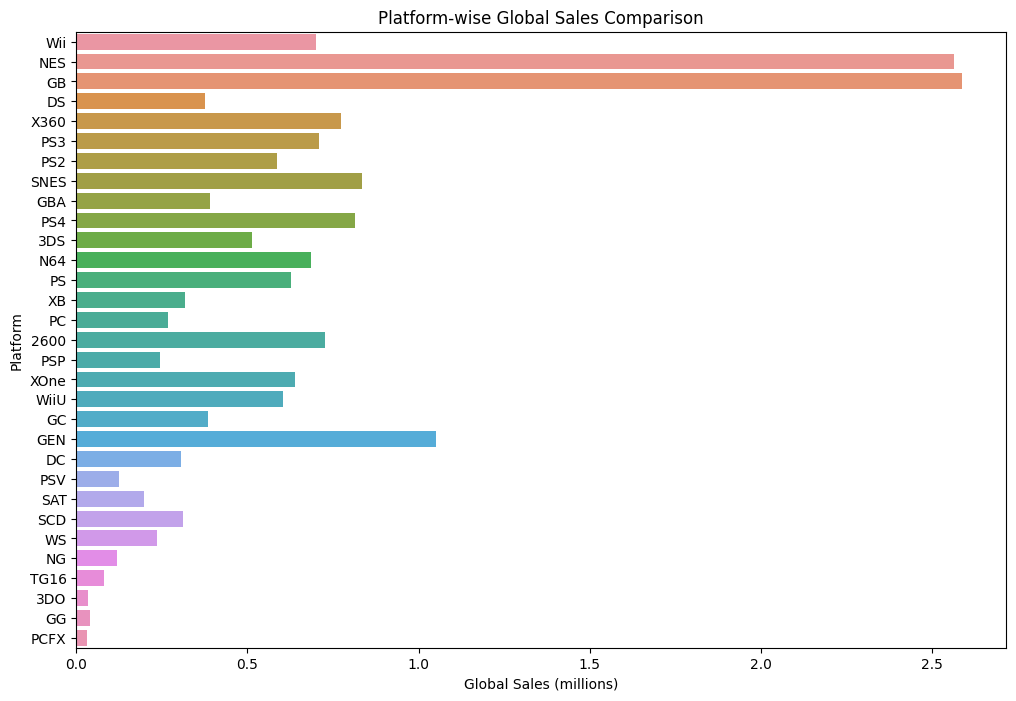

In [23]:
# Visualize platform-wise sales comparison
plt.figure(figsize=(12, 8))
sns.barplot(x='Global_Sales', y='Platform', data=df, ci=None)
plt.title('Platform-wise Global Sales Comparison')
plt.xlabel('Global Sales (millions)')
plt.ylabel('Platform')
plt.show()


<ipython-input-24-71ae8ccbf792>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


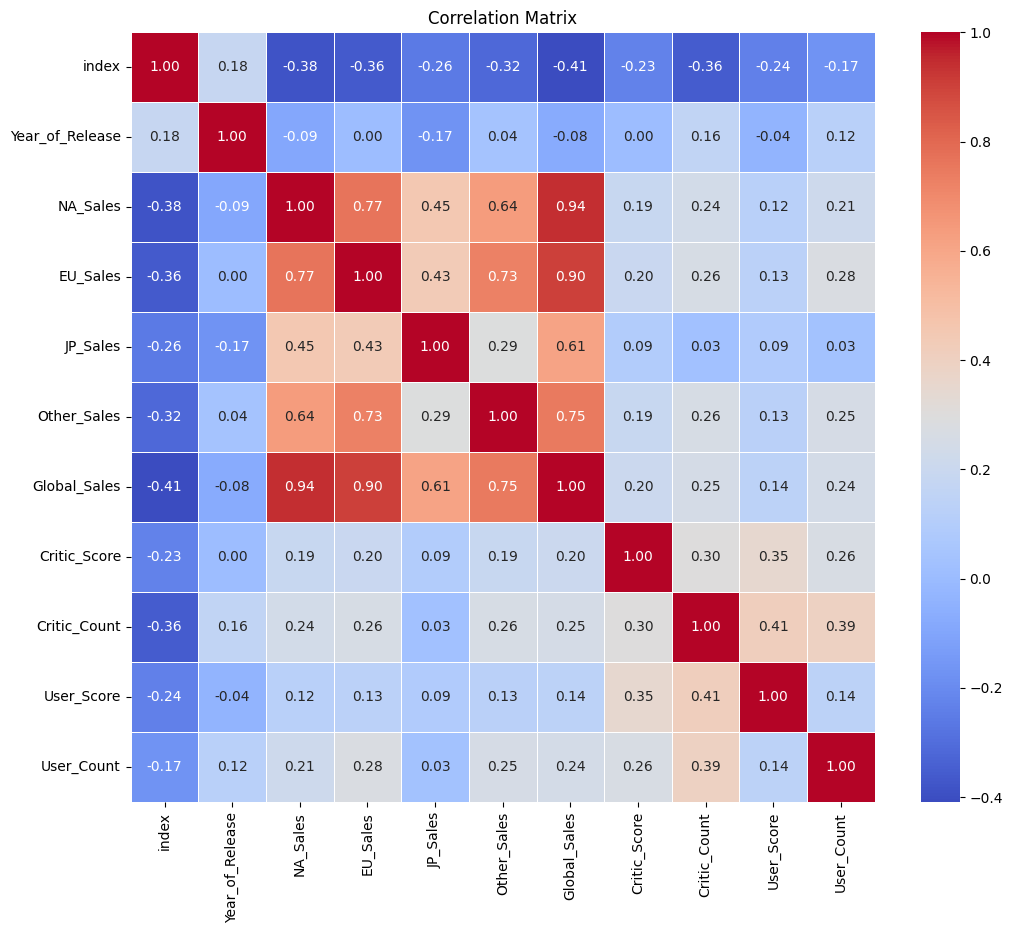

In [24]:
# Create a correlation matrix
correlation_matrix = df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


In [25]:
# Create a correlation matrix
correlation_matrix = df.corr()

# Print the correlation matrix with numeric values
print(correlation_matrix)

                    index  Year_of_Release  NA_Sales  EU_Sales  JP_Sales  \
index            1.000000         0.180381 -0.384994 -0.361113 -0.258584   
Year_of_Release  0.180381         1.000000 -0.092015  0.004212 -0.167428   
NA_Sales        -0.384994        -0.092015  1.000000  0.767045  0.450434   
EU_Sales        -0.361113         0.004212  0.767045  1.000000  0.434423   
JP_Sales        -0.258584        -0.167428  0.450434  0.434423  1.000000   
Other_Sales     -0.319661         0.038523  0.639887  0.725074  0.290642   
Global_Sales    -0.409444        -0.075672  0.941410  0.901955  0.611994   
Critic_Score    -0.230036         0.004571  0.186682  0.195563  0.092974   
Critic_Count    -0.356351         0.160756  0.237226  0.260449  0.026273   
User_Score      -0.236224        -0.039686  0.121098  0.130685  0.086447   
User_Count      -0.169790         0.123535  0.214304  0.278588  0.034371   

                 Other_Sales  Global_Sales  Critic_Score  Critic_Count  \
index        

<ipython-input-25-0e6989690112>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


## Model Development

In [26]:
# Identify categorical columns
categorical_columns = ['Genre', 'Platform', 'Rating', 'Publisher', 'Developer']

# Create dummy variables for categorical columns
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Convert any remaining non-numeric values to numeric or handle them appropriately
df = df.apply(pd.to_numeric, errors='coerce').fillna(0)

# Identify target variable and features
X = df.drop(['Global_Sales'], axis=1)  # Features
y = df['Global_Sales']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Identify numeric columns
numeric_columns = X.select_dtypes(include=['float64', 'int64']).columns

# Fit and transform the training data for numeric columns
X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])

# Transform the testing data for numeric columns
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])


In [29]:
# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


LinearRegression()

In [30]:
# Predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 2.210765217679804e+16
R-squared: -5425524656429745.0


In [31]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Mean Squared Error (Random Forest): {mse_rf}')
print(f'R-squared (Random Forest): {r2_rf}')


Mean Squared Error (Random Forest): 0.6956610001535743
R-squared (Random Forest): 0.8292751361082591
